In [28]:
# Import necessary libraries
from torchvision.datasets import MNIST  # Import dataset
from torch.utils.data import DataLoader     # Import loader for dataset (data - spliter)
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim 
import matplotlib.pyplot as plt 

# Declare the device to execute the task (gpu - cuda, cpu - cpu)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

### Download the MNIST dataset

In [3]:
trainingData = MNIST(root='data',
                     train=True,
                     download=True)

testingData = MNIST(root='data',
                    train=False,
                    download=True)

100.0%
100.0%
100.0%
100.0%


### MNIST - No Normalization - Softmax Regression

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.0, ), (1.0/255, ))])

trainingData = MNIST(root='data', train=True, download=False, transform=transform)
trainLoader = DataLoader(trainingData, batch_size=1024, shuffle=True, num_workers=10)

testingData = MNIST(root='data', train=False, download=False, transform=transform)
testLoader = DataLoader(trainingData, batch_size=1024, shuffle=True, num_workers=10)

In [22]:
softmaxRegressionModel = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=784, out_features=10)
)

softmaxRegressionModel = softmaxRegressionModel.to(device)
print(softmaxRegressionModel)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)


In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(softmaxRegressionModel.parameters(), lr=1e-4)

In [24]:
def evaluateModel(model, testLoader, criterion):
    model.eval()
    testLoss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():

        for images, labels in testLoader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            testLoss += loss.item()

            _, predicted = torch.max(outputs.data, dim=1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    testLoss = testLoss / len(testLoader)
    return accuracy, testLoss 

In [40]:
def trainModel(numberOfEpochs, trainLoader, testLoader, criterion, optimizer, model, device):
    trainLosses = []
    trainAccuracies = []
    testLosses = []
    testAccuracies = []

    for epoch in range(numberOfEpochs):
        
        trainLoss = 0.0
        correct = 0
        total = 0

        for i, (inputs, labels) in enumerate(trainLoader, 0):

            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            trainLoss += loss.item()

            _, predicted = torch.max(outputs.data, dim=1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            loss.backward()
            optimizer.step()
        
        trainAccuracy = 100 * correct / total
        trainLoss = trainLoss / (i+1)
        testAccuracy, testLoss = evaluateModel(softmaxRegressionModel, testLoader, criterion)
        print(f"Epoch {epoch+1}/{numberOfEpochs}, Accuracy: {trainAccuracy:.2f}, Loss: {trainLoss:.4f}, Accuracy: {testAccuracy:.2f}, Loss: {testLoss:.4f}")
    
        trainAccuracies.append(trainAccuracy)
        trainLosses.append(trainLoss)
        testAccuracies.append(testAccuracy)
        testLosses.append(testLoss)

    return trainAccuracies, trainLoss, testAccuracies, testLosses


In [ ]:
trainAccuracies, trainLoss, testAccuracies, testLosses = trainModel(numberOfEpochs=20, trainLoader = trainLoader, testLoader = testLoader,
                                                                    criterion=criterion, optimizer=optimizer, model=softmaxRegressionModel, device=device)

TypeError: trainModel() got an unexpected keyword argument 'device'

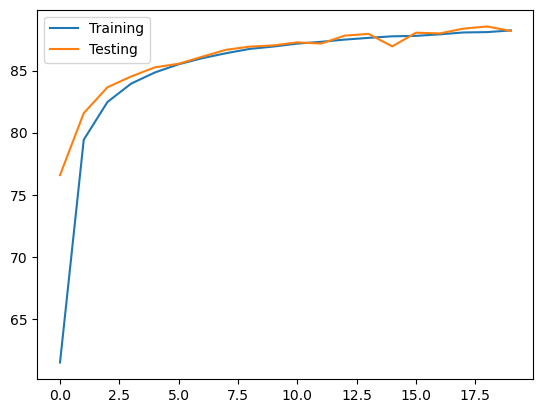

In [26]:
plt.plot(trainAccuracies, label='Training')
plt.plot(testAccuracies, label='Testing')
plt.legend()
plt.show()

### MNIST - Norminalisation - Softmax Regression

In [31]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0,), (1.0,))])

trainingData = MNIST(root='data', download=False, train=True, transform=transform)
trainLoader = DataLoader(trainingData, batch_size=1024, num_workers=10, shuffle=True)

testingData = MNIST(root='data', download=False, train=False, transform=transform)
testLoader = DataLoader(testingData, batch_size=1024, num_workers=10, shuffle=False)

In [34]:
softmaxRegressionModel = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=784, out_features=10)
)
softmaxRegressionModel = softmaxRegressionModel.to(device)

In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(softmaxRegressionModel.parameters(), lr=1e-4)

In [ ]:
trainAccuracies, trainLoss, testAccuracies, testLosses = trainModel(numberOfEpochs=20, trainLoader = trainLoader, testLoader = testLoader,
                                                                    criterion=criterion, optimizer=optimizer, model=softmaxRegressionModel, device=device)

Epoch 1/20, Accuracy: 6.75, Loss: 2.3338, Accuracy: 6.82, Loss: 2.3305
Epoch 2/20, Accuracy: 7.21, Loss: 2.3271, Accuracy: 7.31, Loss: 2.3237
Epoch 3/20, Accuracy: 7.71, Loss: 2.3206, Accuracy: 7.79, Loss: 2.3170
Epoch 4/20, Accuracy: 8.23, Loss: 2.3140, Accuracy: 8.27, Loss: 2.3103
Epoch 5/20, Accuracy: 8.75, Loss: 2.3074, Accuracy: 8.67, Loss: 2.3037
Epoch 6/20, Accuracy: 9.32, Loss: 2.3009, Accuracy: 9.27, Loss: 2.2970
Epoch 7/20, Accuracy: 9.93, Loss: 2.2945, Accuracy: 9.75, Loss: 2.2905
Epoch 8/20, Accuracy: 10.50, Loss: 2.2881, Accuracy: 10.48, Loss: 2.2839
Epoch 9/20, Accuracy: 11.18, Loss: 2.2816, Accuracy: 11.16, Loss: 2.2775
Epoch 10/20, Accuracy: 11.79, Loss: 2.2754, Accuracy: 11.77, Loss: 2.2710
Epoch 11/20, Accuracy: 12.52, Loss: 2.2690, Accuracy: 12.40, Loss: 2.2646
